In [5]:
!pip install tensorflow
!pip install keras

In [7]:
# diretorios
dataset_dir = '/Users/wise/Desktop/pistachio_image_dataset'
destino_dir = '/Users/wise/Desktop/pistachio_image_dataset/pistachio_small'

import os, shutil, pathlib
  
original_dir = pathlib.Path("/Users/wise/Desktop/pistachio_image_dataset")                           
new_base_dir = pathlib.Path("/Users/wise/Desktop/pistachio_image_dataset/pistachio_small")              
 
def make_subset(subset_name, start_index, end_index):          
    for category in ("siirt", "kirmizi"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category} {i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            try:
                shutil.copyfile(src=original_dir / fname,
                                dst=dir / fname)
            except:
                continue
make_subset("train", start_index=0, end_index=300)            
make_subset("validation", start_index=300, end_index=500)    
make_subset("test", start_index=500, end_index=700)

In [8]:
from tensorflow import keras 
from tensorflow.keras import layers
import keras

In [9]:
inputs = keras.Input(shape=(224, 224, 3))                                                      
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0     

In [10]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                                                    new_base_dir / 'train',
                                                    target_size=(224, 224),
                                                    batch_size=200, #perceber se é igual ao x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
                                                    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
                                                        new_base_dir / 'validation',
                                                        target_size=(224, 224),
                                                        batch_size=200,
                                                        class_mode='binary')

Found 598 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")]

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - 30s 10s/step - loss: 0.4727 - accuracy: 0.7809 - val_loss: 0.6825 - val_accuracy: 0.6850
Epoch 2/10
3/3 [==============================] - 30s 11s/step - loss: 0.5011 - accuracy: 0.7676 - val_loss: 0.4033 - val_accuracy: 0.8225
Epoch 3/10
3/3 [==============================] - 29s 10s/step - loss: 0.3951 - accuracy: 0.8211 - val_loss: 0.4099 - val_accuracy: 0.8225
Epoch 4/10
3/3 [==============================] - 29s 10s/step - loss: 0.4360 - accuracy: 0.7893 - val_loss: 0.3887 - val_accuracy: 0.8300
Epoch 5/10
3/3 [==============================] - 29s 10s/step - loss: 0.3788 - accuracy: 0.8211 - val_loss: 0.3784 - val_accuracy: 0.8325
Epoch 6/10
3/3 [==============================] - 28s 10s/step - loss: 0.3979 - accuracy: 0.8161 - val_loss: 0.4370 - val_accuracy: 0.8025
Epoch 7/10
3/3 [==============================] - 28s 10s/step - loss: 0.4060 - accuracy: 0.8027 - val_loss: 0.3802 - val_accuracy: 0.8325
Epoch 8/10
3/3 [===========

In [15]:
model.save('pistachio_small.h5')

In [16]:
import matplotlib.pyplot as plt

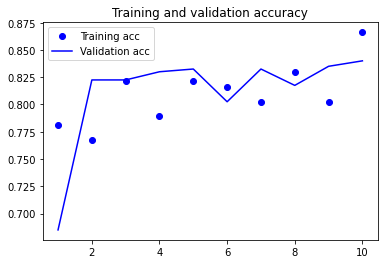

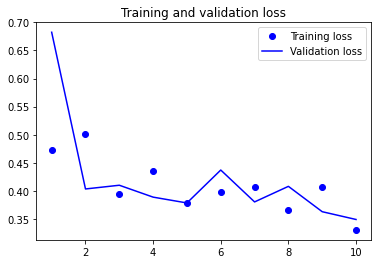

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [59]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [60]:
from keras.preprocessing import image

fnames = [os.path.join(new_base_dir / 'train' / 'siirt', fname) for fname in os.listdir(new_base_dir / 'train' / 'siirt')]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(224, 224))

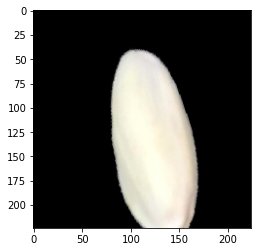

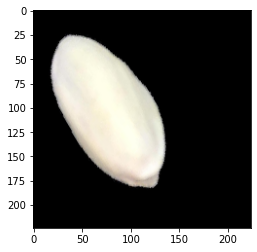

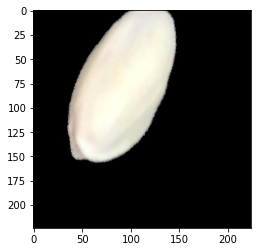

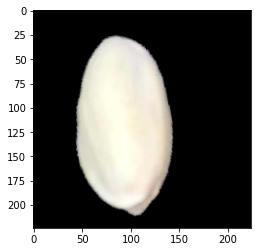

In [61]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [62]:
import tensorflow as tf 
from tensorflow.keras import optimizers

model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [64]:
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    new_base_dir / 'train',
                                                    target_size=(224, 224),
                                                    batch_size=200,
                                                    class_mode='binary',
                                                    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
                                                        new_base_dir / 'validation',
                                                        target_size=(224, 224),
                                                        batch_size=200,
                                                        class_mode='binary',
                                                        shuffle=True)
history = model.fit_generator(
                            train_generator,
                            epochs=20,
                            validation_data=validation_generator)

Found 598 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/20
3/3 [==============================] - 36s 12s/step - loss: 1.1598 - accuracy: 0.4983 - val_loss: 0.7399 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 36s 12s/step - loss: 0.7000 - accuracy: 0.5184 - val_loss: 0.7115 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 32s 10s/step - loss: 0.6917 - accuracy: 0.5234 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 34s 12s/step - loss: 0.6919 - accuracy: 0.5251 - val_loss: 0.6767 - val_accuracy: 0.6325
Epoch 5/20
3/3 [==============================] - 32s 11s/step - loss: 0.7201 - accuracy: 0.5502 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 30s 10s/step - loss: 0.6816 - accuracy: 0.5452 - val_loss: 0.7176 - val_accuracy: 0.5050
Epoch 7/20
3/3 [==============================] - 28s 9s/step - loss: 0.7029 - accur

In [65]:
model.save('pistachio_small_2.h5')

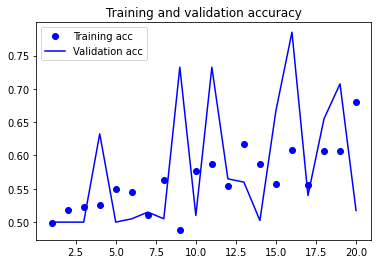

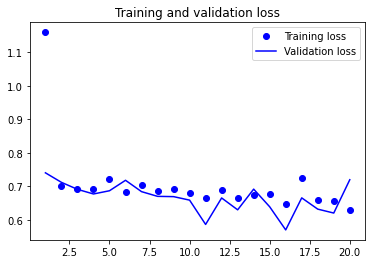

In [66]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()